## 데이터 확인하기

In [ ]:
!pip install konlpy
!pip install soynlp
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 4.9 MB/s 
     |████████████████████████████████| 453 kB 66.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 416 kB 4.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.2 MB 5.1 MB/s 
     |████████████████████████████████| 86 kB 5.6 MB/s 
     |████████████████████████████████| 596 kB 50.0 MB/s 
     |████████████████████████████████| 6.6 MB 54.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import pandas as pd
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import re
from tensorflow.keras.models import load_model
from konlpy.tag import Hannanum
import matplotlib.pyplot as plt

In [ ]:
youtube_df = pd.read_csv("youtube_data.csv", lineterminator='\n')
youtube_df.head(10)

,Unnamed: 0,Unnamed: 0.1,comments,likes
0,0,0,파나메라는 역시 패스트백 스타일이 잘어울리는 차네요.😄😄,4
1,1,1,진짜 너무 짱이다....ㅠㅠ....타보고싶어,5
2,2,2,파나메라는 기본형도 예쁘지만 이그제큐티브 모델이야 말로 4도어 대형 세단의 모습으로...,4
3,3,3,기업 총수가 된다면 대형 세단대신 꼭 타보고 싶은차.. 왠지 타다보면 기사님 뒤에 ...,3
4,4,4,무더운 날씨에 고생많으시네요늘 좋은 영상 감사합니다,4
5,5,5,간결하고 빠른 설명 정말 좋네요,1
6,6,6,12:55 이차도 전동 트렁크라 그런지 특유의 과감하게 닫아버리는 한상기 트렁크를 ...,9
7,7,7,사고싶다 ㅎㅎㅎ,1
8,8,8,잔고장이 어느정도있는편인가요?,2
9,9,9,최고의 차죠!,1


In [ ]:
youtube_df['likes'].fillna(0,inplace=True)

In [ ]:
youtube_df

,Unnamed: 0,Unnamed: 0.1,comments,likes
0,0,0,파나메라는 역시 패스트백 스타일이 잘어울리는 차네요.😄😄,4
1,1,1,진짜 너무 짱이다....ㅠㅠ....타보고싶어,5
2,2,2,파나메라는 기본형도 예쁘지만 이그제큐티브 모델이야 말로 4도어 대형 세단의 모습으로...,4
3,3,3,기업 총수가 된다면 대형 세단대신 꼭 타보고 싶은차.. 왠지 타다보면 기사님 뒤에 ...,3
4,4,4,무더운 날씨에 고생많으시네요늘 좋은 영상 감사합니다,4
...,...,...,...,...
276172,179,179,불메운동해서 패스~,3
276173,180,180,3년째 타는데 몇몇 단점빼고는 좋아요토요타의 극강의 내구도로 때맞춰 서비스만 하면 ...,2
276174,181,181,넘 멋지네요,3
276175,182,182,이차. 강서에 아직있나요.,3


In [ ]:
youtube_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276177 entries, 0 to 276176
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Unnamed: 0    276177 non-null  int64 
 1   Unnamed: 0.1  276177 non-null  int64 
 2   comments      275960 non-null  object
 3   likes         276177 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 8.4+ MB


In [ ]:
# 빈 행제거
youtube_df.loc[youtube_df.comments.isnull()]
youtube_df

,Unnamed: 0,Unnamed: 0.1,comments,likes
0,0,0,파나메라는 역시 패스트백 스타일이 잘어울리는 차네요.😄😄,4
1,1,1,진짜 너무 짱이다....ㅠㅠ....타보고싶어,5
2,2,2,파나메라는 기본형도 예쁘지만 이그제큐티브 모델이야 말로 4도어 대형 세단의 모습으로...,4
3,3,3,기업 총수가 된다면 대형 세단대신 꼭 타보고 싶은차.. 왠지 타다보면 기사님 뒤에 ...,3
4,4,4,무더운 날씨에 고생많으시네요늘 좋은 영상 감사합니다,4
...,...,...,...,...
276172,179,179,불메운동해서 패스~,3
276173,180,180,3년째 타는데 몇몇 단점빼고는 좋아요토요타의 극강의 내구도로 때맞춰 서비스만 하면 ...,2
276174,181,181,넘 멋지네요,3
276175,182,182,이차. 강서에 아직있나요.,3


In [ ]:
youtube_df = youtube_df.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(youtube_df.isnull().values.any()) # Null 값이 존재하는지 확인
youtube_df

False


,Unnamed: 0,Unnamed: 0.1,comments,likes
0,0,0,파나메라는 역시 패스트백 스타일이 잘어울리는 차네요.😄😄,4
1,1,1,진짜 너무 짱이다....ㅠㅠ....타보고싶어,5
2,2,2,파나메라는 기본형도 예쁘지만 이그제큐티브 모델이야 말로 4도어 대형 세단의 모습으로...,4
3,3,3,기업 총수가 된다면 대형 세단대신 꼭 타보고 싶은차.. 왠지 타다보면 기사님 뒤에 ...,3
4,4,4,무더운 날씨에 고생많으시네요늘 좋은 영상 감사합니다,4
...,...,...,...,...
276172,179,179,불메운동해서 패스~,3
276173,180,180,3년째 타는데 몇몇 단점빼고는 좋아요토요타의 극강의 내구도로 때맞춰 서비스만 하면 ...,2
276174,181,181,넘 멋지네요,3
276175,182,182,이차. 강서에 아직있나요.,3


In [ ]:
youtube_df = youtube_df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)
youtube_df

,comments,likes
0,파나메라는 역시 패스트백 스타일이 잘어울리는 차네요.😄😄,4
1,진짜 너무 짱이다....ㅠㅠ....타보고싶어,5
2,파나메라는 기본형도 예쁘지만 이그제큐티브 모델이야 말로 4도어 대형 세단의 모습으로...,4
3,기업 총수가 된다면 대형 세단대신 꼭 타보고 싶은차.. 왠지 타다보면 기사님 뒤에 ...,3
4,무더운 날씨에 고생많으시네요늘 좋은 영상 감사합니다,4
...,...,...
276172,불메운동해서 패스~,3
276173,3년째 타는데 몇몇 단점빼고는 좋아요토요타의 극강의 내구도로 때맞춰 서비스만 하면 ...,2
276174,넘 멋지네요,3
276175,이차. 강서에 아직있나요.,3


In [ ]:
youtube_df = youtube_df.reset_index()
youtube_df

,index,comments,likes
0,0,파나메라는 역시 패스트백 스타일이 잘어울리는 차네요.😄😄,4
1,1,진짜 너무 짱이다....ㅠㅠ....타보고싶어,5
2,2,파나메라는 기본형도 예쁘지만 이그제큐티브 모델이야 말로 4도어 대형 세단의 모습으로...,4
3,3,기업 총수가 된다면 대형 세단대신 꼭 타보고 싶은차.. 왠지 타다보면 기사님 뒤에 ...,3
4,4,무더운 날씨에 고생많으시네요늘 좋은 영상 감사합니다,4
...,...,...,...
275955,276172,불메운동해서 패스~,3
275956,276173,3년째 타는데 몇몇 단점빼고는 좋아요토요타의 극강의 내구도로 때맞춰 서비스만 하면 ...,2
275957,276174,넘 멋지네요,3
275958,276175,이차. 강서에 아직있나요.,3


## 네이버 영화 리뷰 감성분석 학습


In [ ]:
import urllib.request
import numpy as np
from tqdm import tqdm
from konlpy.tag import Okt
from sklearn.model_selection import train_test_split


In [ ]:
# 네이버 영화 리뷰 데이터
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")

('ratings_test.txt', <http.client.HTTPMessage at 0x7f4d5d0e4390>)

In [ ]:
train_data = pd.read_table('ratings_train.txt')
test_data = pd.read_table('ratings_test.txt')

In [ ]:
train_data

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


In [ ]:
print('훈련용 리뷰 개수 :',len(train_data)) # 훈련용 리뷰 개수 출력

훈련용 리뷰 개수 : 150000


In [ ]:
train_data[:5] # 상위 5개 출력


,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [ ]:
print('테스트용 리뷰 개수 :',len(test_data)) # 테스트용 리뷰 개수 출력


테스트용 리뷰 개수 : 50000


In [ ]:
test_data[:5]


,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [ ]:
# document 열과 label 열의 중복을 제외한 값의 개수
train_data['document'].nunique(), train_data['label'].nunique()

(146182, 2)

In [ ]:
# document 열의 중복 제거
train_data.drop_duplicates(subset=['document'], inplace=True)

In [ ]:
print('총 샘플의 수 :',len(train_data))

총 샘플의 수 : 146183


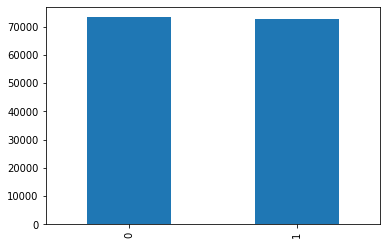

In [ ]:
train_data['label'].value_counts().plot(kind = 'bar')

In [ ]:
print(train_data.groupby('label').size().reset_index(name = 'count'))


   label  count
0      0  73342
1      1  72841


In [ ]:
print(train_data.isnull().values.any())


True


In [ ]:
print(train_data.isnull().sum())


id          0
document    1
label       0
dtype: int64


In [ ]:
train_data.loc[train_data.document.isnull()]


,id,document,label
25857,2172111,NaN,1


In [ ]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [ ]:
print(len(train_data))


146182


In [ ]:
# 한글과 공백을 제외하고 모두 제거
train_data['document'] = train_data['document'].str.replace("[^A-Za-z0-9ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data[:5]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1


In [ ]:
train_data['document'] = train_data['document'].str.replace('^ +', "") # white space 데이터를 empty value로 변경
train_data['document'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


id            0
document    113
label         0
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
train_data.loc[train_data.document.isnull()][:5]


,id,document,label
1840,7095375,NaN,1
2648,423224,NaN,1
2968,7957379,NaN,1
3887,6959675,NaN,1
4899,7872211,NaN,1


In [ ]:
train_data = train_data.dropna(how = 'any')
print(len(train_data))

146069


In [ ]:
test_data.drop_duplicates(subset = ['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['document'] = test_data['document'].str.replace('^ +', "") # 공백은 empty 값으로 변경
test_data['document'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 48852


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [ ]:
han = Hannanum()

X_train = []
for sentence in tqdm(train_data['document']):
    tokenized_sentence = han.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_train.append(stopwords_removed_sentence)

100%|██████████| 146069/146069 [11:50<00:00, 205.73it/s]


In [ ]:
print(X_train[:3])


[['아', '더빙', '진짜', '짜증나다', '목소리'], ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'], ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다']]


In [ ]:
X_test = []
for sentence in tqdm(test_data['document']):
    tokenized_sentence = han.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_test.append(stopwords_removed_sentence)

100%|██████████| 48852/48852 [04:46<00:00, 170.39it/s]


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
print(tokenizer.word_index)


{'영화': 1, '보다': 2, '을': 3, '없다': 4, '이다': 5, '있다': 6, '좋다': 7, '너무': 8, '다': 9, '정말': 10, '되다': 11, '재밌다': 12, '적': 13, '만': 14, '같다': 15, '진짜': 16, '로': 17, '점': 18, '아니다': 19, '않다': 20, '에서': 21, '만들다': 22, '나오다': 23, '연기': 24, '것': 25, '평점': 26, '내': 27, '최고': 28, '그': 29, '나': 30, '인': 31, '안': 32, '스토리': 33, '생각': 34, '못': 35, '왜': 36, '드라마': 37, '게': 38, '감동': 39, '사람': 40, '보고': 41, '1': 42, '이렇다': 43, '말': 44, '고': 45, '아깝다': 46, '더': 47, '때': 48, '배우': 49, 'ㅋㅋ': 50, '아': 51, '감독': 52, '거': 53, '그냥': 54, '재미있다': 55, '요': 56, '재미': 57, '내용': 58, '중': 59, '뭐': 60, '까지': 61, '주다': 62, '자다': 63, '하고': 64, '지루하다': 65, '재미없다': 66, '수': 67, '쓰레기': 68, '시간': 69, '네': 70, '가다': 71, '모르다': 72, '들다': 73, '그렇다': 74, '싶다': 75, '지': 76, '작품': 77, '10': 78, '사랑': 79, '알다': 80, '하나': 81, '다시': 82, '마지막': 83, '볼': 84, '이건': 85, '저': 86, '정도': 87, '오다': 88, 'ㅋ': 89, '완전': 90, 'ㅠㅠ': 91, '많다': 92, '처음': 93, 'ㅋㅋㅋ': 94, '장면': 95, '액션': 96, '주인공': 97, '2': 98, '이렇게': 99, '걸': 100, '안되다': 101, '차다': 1

In [ ]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 47988
등장 빈도가 2번 이하인 희귀 단어의 수: 27713
단어 집합에서 희귀 단어의 비율: 57.74985413019922
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.070268635295472


In [ ]:
# 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
# 단어 집합의 크기 : 20276
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 20276


In [ ]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
print(X_train[:3])

[[51, 462, 16, 262, 673], [955, 465, 41, 615, 1, 217, 1481, 24, 981, 687, 20], [391, 2498, 2366, 5658, 2, 225, 9]]


In [ ]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

In [ ]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]


In [ ]:
# 빈 샘플들을 제거
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

145690
145690


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


리뷰의 최대 길이 : 69
리뷰의 평균 길이 : 10.978145377170705


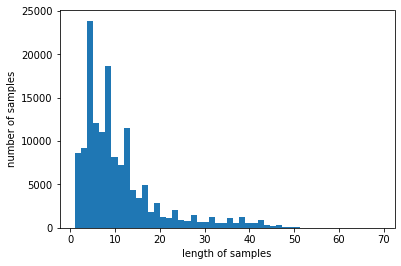

In [ ]:
print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [ ]:
max_len = 30
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 30 이하인 샘플의 비율: 94.13206122589058


In [ ]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

## LSTM으로 감성분석하기

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/15
1821/1822 [============================>.] - ETA: 0s - loss: 0.3846 - acc: 0.8265
Epoch 1: val_acc improved from -inf to 0.84649, saving model to best_model.h5
1822/1822 [==============================] - 177s 95ms/step - loss: 0.3846 - acc: 0.8265 - val_loss: 0.3512 - val_acc: 0.8465
Epoch 2/15
1821/1822 [============================>.] - ETA: 0s - loss: 0.3221 - acc: 0.8608
Epoch 2: val_acc improved from 0.84649 to 0.85720, saving model to best_model.h5
1822/1822 [==============================] - 176s 97ms/step - loss: 0.3221 - acc: 0.8608 - val_loss: 0.3310 - val_acc: 0.8572
Epoch 3/15
1821/1822 [============================>.] - ETA: 0s - loss: 0.2959 - acc: 0.8756
Epoch 3: val_acc improved from 0.85720 to 0.86162, saving model to best_model.h5
1822/1822 [==============================] - 173s 95ms/step - loss: 0.2959 - acc: 0.8756 - val_loss: 0.3279 - val_acc: 0.8616
Epoch 4/15
1821/1822 [============================>.] - ETA: 0s - loss: 0.2762 - acc: 0.8856
Epoch 4: v

In [ ]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

1527/1527 [==============================] - 22s 14ms/step - loss: 0.3364 - acc: 0.8562

 테스트 정확도: 0.8562


In [ ]:
def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^A-Za-z0-9ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = han.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.5):
    labeling = str("{:.2f}% 확률로 긍정 댓글입니다.\n".format(score * 100))
  else:
    labeling = str("{:.2f}% 확률로 부정 댓글입니다.\n".format((1 - score) * 100))
  return labeling

In [ ]:
result = sentiment_predict('최고의 차죠?')

type(result)

str

In [ ]:
words = youtube_df['comments']
youtube_df['labeling'] = ''


for idx, comment in enumerate(words[:50]):
  labeling = sentiment_predict(comment)
  youtube_df['labeling'][idx] = labeling
youtube_df[:50]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Unnamed: 0,Unnamed: 0.1,comments,likes,labeling
0,0,0,파나메라는 역시 패스트백 스타일이 잘어울리는 차네요.😄😄,4,95.56% 확률로 긍정 댓글입니다.\n
1,1,1,진짜 너무 짱이다....ㅠㅠ....타보고싶어,5,98.77% 확률로 긍정 댓글입니다.\n
2,2,2,파나메라는 기본형도 예쁘지만 이그제큐티브 모델이야 말로 4도어 대형 세단의 모습으로...,4,85.88% 확률로 긍정 댓글입니다.\n
3,3,3,기업 총수가 된다면 대형 세단대신 꼭 타보고 싶은차.. 왠지 타다보면 기사님 뒤에 ...,3,62.31% 확률로 긍정 댓글입니다.\n
4,4,4,무더운 날씨에 고생많으시네요늘 좋은 영상 감사합니다,4,99.33% 확률로 긍정 댓글입니다.\n
5,5,5,간결하고 빠른 설명 정말 좋네요,1,97.30% 확률로 긍정 댓글입니다.\n
6,6,6,12:55 이차도 전동 트렁크라 그런지 특유의 과감하게 닫아버리는 한상기 트렁크를 ...,9,89.04% 확률로 부정 댓글입니다.\n
7,7,7,사고싶다 ㅎㅎㅎ,1,93.16% 확률로 긍정 댓글입니다.\n
8,8,8,잔고장이 어느정도있는편인가요?,2,78.63% 확률로 부정 댓글입니다.\n
9,9,9,최고의 차죠!,1,87.99% 확률로 긍정 댓글입니다.\n


In [ ]:
# 임의로 100개만 해보기
words = youtube_df['comments']
youtube_df['labeling'] = ''

for idx, comment in enumerate(words[:100]):
  if '?','궁금' in comment:
    youtube_df['labeling'][idx] = -1
    print(youtube_df.iloc[idx])
  else:
    labeling = sentiment_predict(comment)
    if '긍정' in labeling:  
      youtube_df['labeling'][idx] = 0
      print(youtube_df.iloc[idx])
    elif '부정' in labeling:
      youtube_df['labeling'][idx] = 1
      print(youtube_df.iloc[idx])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


Unnamed: 0                                    0
Unnamed: 0.1                                  0
comments        파나메라는 역시 패스트백 스타일이 잘어울리는 차네요.😄😄
likes                                         4
labeling                                      0
Name: 0, dtype: object
Unnamed: 0                             1
Unnamed: 0.1                           1
comments        진짜 너무 짱이다....ㅠㅠ....타보고싶어
likes                                  5
labeling                               0
Name: 1, dtype: object
Unnamed: 0                                                      2
Unnamed: 0.1                                                    2
comments        파나메라는 기본형도 예쁘지만 이그제큐티브 모델이야 말로 4도어 대형 세단의 모습으로...
likes                                                           4
labeling                                                        0
Name: 2, dtype: object
Unnamed: 0                                                      3
Unnamed: 0.1                                                    3
comments        기업 총수가 된

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Unnamed: 0                   11
Unnamed: 0.1                 11
comments        뜬금없지만 날씨 넘 좋다요👍
likes                         1
labeling                      0
Name: 11, dtype: object
Unnamed: 0                                                    12
Unnamed: 0.1                                                  12
comments        며칠전 시내주행하다 결함으로 멈춰있는 신형포르쉐를 보고 보란듯이 신나게 달려주었습니다.
likes                                                          2
labeling                                                       0
Name: 12, dtype: object
Unnamed: 0                             13
Unnamed: 0.1                           13
comments        진짜이쁘다 파라메라 완전 실용적인데 이뻐 ㅜㅜ
likes                                   1
labeling                                0
Name: 13, dtype: object
Unnamed: 0                                                     14
Unnamed: 0.1                                                   14
comments        한상기님은 S 400d와 이젝큐티브 중 뭘 선택하실건가요? 이번에 구입하면 10년 ...
likes                              

In [ ]:
youtube_df[:100]

,Unnamed: 0,Unnamed: 0.1,comments,likes,labeling
0,0,0,파나메라는 역시 패스트백 스타일이 잘어울리는 차네요.😄😄,4,0
1,1,1,진짜 너무 짱이다....ㅠㅠ....타보고싶어,5,0
2,2,2,파나메라는 기본형도 예쁘지만 이그제큐티브 모델이야 말로 4도어 대형 세단의 모습으로...,4,0
3,3,3,기업 총수가 된다면 대형 세단대신 꼭 타보고 싶은차.. 왠지 타다보면 기사님 뒤에 ...,3,0
4,4,4,무더운 날씨에 고생많으시네요늘 좋은 영상 감사합니다,4,0
...,...,...,...,...,...
95,95,95,역시 포르쉐 점심 맛나는거 드셧나요?,2,-1
96,96,96,앞에 1억으로 못봣네 ㅎㅎ,1,0
97,97,97,파나메라는 파나마나 하하하하핫,2,1
98,98,98,어차피 못살 차인데 난 왜 이걸 보고 있는가? ㅋ,3,-1


In [ ]:
# youtude_df.to_csv('./youtude_data_labeled')

## GRU로 감성 분석하기(시간남으면)

## 긍정, 부정 데이터 분리(먼저 해보기)
- 임의로 100개만 해보기

In [ ]:
# 긍정
positive_comments = youtube_df[youtube_df['labeling'] == 1]
positive_comments.reset_index()

KeyError: ignored

In [ ]:
# 부정
negative_comments = youtube_df[youtube_df['labeling'] == 0]

negative_comments.reset_index()

,index,Unnamed: 0,Unnamed: 0.1,comments,likes,labeling
0,0,0,0,파나메라는 역시 패스트백 스타일이 잘어울리는 차네요.😄😄,4,0
1,1,1,1,진짜 너무 짱이다....ㅠㅠ....타보고싶어,5,0
2,2,2,2,파나메라는 기본형도 예쁘지만 이그제큐티브 모델이야 말로 4도어 대형 세단의 모습으로...,4,0
3,3,3,3,기업 총수가 된다면 대형 세단대신 꼭 타보고 싶은차.. 왠지 타다보면 기사님 뒤에 ...,3,0
4,4,4,4,무더운 날씨에 고생많으시네요늘 좋은 영상 감사합니다,4,0
5,5,5,5,간결하고 빠른 설명 정말 좋네요,1,0
6,7,7,7,사고싶다 ㅎㅎㅎ,1,0
7,9,9,9,최고의 차죠!,1,0
8,11,11,11,뜬금없지만 날씨 넘 좋다요👍,1,0
9,12,12,12,며칠전 시내주행하다 결함으로 멈춰있는 신형포르쉐를 보고 보란듯이 신나게 달려주었습니다.,2,0


In [ ]:
# 중립
neutrality_comments = youtube_df[youtube_df['labeling'] == -1]

neutrality_comments.reset_index()

,index,Unnamed: 0,Unnamed: 0.1,comments,likes,labeling
0,8,8,8,잔고장이 어느정도있는편인가요?,2,-1
1,10,10,10,전면 디자인 터보 전용 아닌가요? 일반 파나메라는 스포츠 범퍼 옵션 선택 못 하는 ...,197,-1
2,14,14,14,한상기님은 S 400d와 이젝큐티브 중 뭘 선택하실건가요? 이번에 구입하면 10년 ...,2,-1
3,18,18,18,궁금한게 있는데요 혹시 20년식 파나메라 하이브리드도 pdcc가 기본인가용?,2,-1
4,21,21,21,뒷좌석을둘로 가르는 터널을 없애거나낮추면 공간이 훨씬 넉넉해질 건데..저걸 그대로 ...,1,-1
5,27,27,27,정식수입이 아닌 직수한 차량을 한글화 프로그램으로 업데이트하여 파나로마 라고 나온것...,1,-1
6,28,28,28,s클레스랑 가격이비슷한데 데일리카로 어떤차를 추천하시나요?,2,-1
7,30,30,30,8시리즈그란쿠페 40i랑 비교하면 어떻게 생각하세요?^^ 승차감&운동성능이요....,1,-1
8,32,32,32,포르쉐... 남자의 로망아니겠습니까?,3,-1
9,38,38,38,파나메라와 기존 f세그먼트 세단인 s클래스와 비교한다면 파나메라가 가지는 장점과 단...,1,-1


## 텍스트 전처리

In [ ]:
!pip install git+https://github.com/ssut/py-hanspell.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ssut/py-hanspell.git to /tmp/pip-req-build-msvg170k
  Running command git clone -q https://github.com/ssut/py-hanspell.git /tmp/pip-req-build-msvg170k
  Created wheel for py-hanspell: filename=py_hanspell-1.1-py3-none-any.whl size=4868 sha256=c41a5e0957973702fd6de5aba74ba581c396dc21a7e2d76b57b711088b0851e4
  Stored in directory: /tmp/pip-ephem-wheel-cache-fodyuf3m/wheels/ab/f5/7b/d4124bb329c905301baed80e2ae45aa14e824f62ebc3ec2cc4
Successfully built py-hanspell


## 특수문자 제거

In [ ]:
# 한글과 영어, 공백을 제외하고 모두 제거


# for i, document in enumerate(words):
#     words[i] = re.sub(r'[^ A-Za-z0-9ㄱ-ㅎㅏ-ㅣ가-힣 ]', '', document)

# youtube_df

# 일단 긍정 댓글로 분류된 것 전처리 -> 워드 클라우드를 위해서 

youtube_df['comments'] = youtube_df['comments'].str.replace("[^A-Za-z0-9ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
youtube_df['comments']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  if sys.path[0] == '':


0                              파나메라는 역시 패스트백 스타일이 잘어울리는 차네요
1                                          진짜 너무 짱이다ㅠㅠ타보고싶어
2         파나메라는 기본형도 예쁘지만 이그제큐티브 모델이야 말로 4도어 대형 세단의 모습으로...
3         기업 총수가 된다면 대형 세단대신 꼭 타보고 싶은차 왠지 타다보면 기사님 뒤에 태우...
4                              무더운 날씨에 고생많으시네요늘 좋은 영상 감사합니다
                                ...                        
275955                                            불메운동해서 패스
275956    3년째 타는데 몇몇 단점빼고는 좋아요토요타의 극강의 내구도로 때맞춰 서비스만 하면 ...
275957                                               넘 멋지네요
275958                                         이차 강서에 아직있나요
275959                                             드림카 중 하나
Name: comments, Length: 275960, dtype: object

## 정규화 및 띄어쓰기 교정
- okt 아니면 spell_checker 사용

In [ ]:
# 정규화
# okt = Okt()

# words = positive_comments['comments']

# normalize_sentence_lst = []

# for i in word[:100]:
#     normalize_sentence = okt.normalize(i)
#     normalize_sentence_lst.append(normalize_sentence)
#     print(normalize_sentence)

# print(normalize_sentence_lst)

In [ ]:
from hanspell import spell_checker
from tqdm import TqdmWarning

words = youtube_df['comments']

hanspell_sent_lst = []
for i in tqdm(words[:10000]):
  try:
    spelled_sent = spell_checker.check(i) # 맞춤법 검사하기

    hanspell_sent = spelled_sent.checked # 띄어쓰기 교정
    youtube_df['comments'][i] = hanspell_sent

    hanspell_sent_lst.append(hanspell_sent)
    print(i)
    print(hanspell_sent)

  except:
    youtube_df['comments'][i] = youtube_df['comments'][i]

#   hanspell_sent_lst.append(hanspell_sent)
#   print(hanspell_sent)

# print(hanspell_sent_lst)

youtube_df.head(10)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
youtube_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275960 entries, 0 to 275959
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   index     275960 non-null  int64 
 1   comments  275960 non-null  object
 2   likes     275960 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 6.3+ MB


In [ ]:
  spelled_sent = spell_checker.check('파나메라는 기본형도 예쁘지만 이그제큐티브 모델이야 말로 4도어 대형 세단의 모습으로써 길이가 완벽한 것 같아요 한번 보니 기본형 모델은 짧아서 스포티하면서 예쁘긴한데 911에서 조금 늘린듯한 모습으로 보이기도 하고 뒷 도어도 짧아보이고 승하차랑 발 두는 게 조금 답답해보였는데 이그제큐티브는 완벽히 편해보이면서 앞 뒤 도어의 밸런스가 맞아 옆에서 보면 딱 예쁘네요 다만 페이스리프트의 유일한 단점인 리어램프는 3단이 없어지긴 했지만 예뻐지긴 했는데 브레이크 등이 2발로 변한 건 너무 아쉽습니다 페이스리프트 전이 확실히 4발이라 존재감이 어마어마하더군요 카이엔처럼 뒤에 이어지는 리어램프에서 갈고리를 조금 크게하고 브레이크 등을 4발로 넣었으면 완벽했을텐데 하는 아쉬움이 있습니다 어차피 얇게 넣을 거면 말이죠 그리고 인증때문이긴 하지만 개인적으로는 앞에 데이라이트 등도 2줄로 된 터보 스타일도 예쁜데 기본형 한 줄이 더 차분해서 좋았는데 살짝 아쉽긴 하네요 그래도 너무 갖고 싶은 완전 완벽한 차라는 점...') # 맞춤법 검사하기

  hanspell_sent = spelled_sent.checked
  print(hanspell_sent)

In [ ]:
youtube_df['comments'] = hanspell_sent_lst

ValueError: ignored

In [ ]:
# 불용어 설정

stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [ ]:
# hannanum.nouns
# -> 띄어쓰가 잘 안됨. -> 특수문자 제거하면 

han = Hannanum()

youtube_review_han_nouns = []

for i in tqdm(hanspell_sent_lst):
    tokenized_sentence = han.nouns(i)
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    youtube_review_han_nouns.append(stopwords_removed_sentence)
    # 글자수 한자리인 것은 불용어 사전에 넣기
    for j in stopwords_removed_sentence:
      if len(j) <= 1 or 'ㅋ' in j:
        stopwords.append(j)
    # print(stopwords_removed_sentence)
print(stopwords)

print(youtube_review_han_nouns)

100%|██████████| 10000/10000 [00:52<00:00, 190.22it/s]

['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다', '백', '차', '대', '뒤', '나', '것', 'ㅋㅋㅋ', '편', '걸', '전', '보', '듯', '님', '중', '뭐', '저', '저', '둘', '유', '데', '수', '리', '카', '그', '파', '지', '형', '화', '첨', '거', '두', '후', '킹', 'ㅋㅋㅋㅋㅋ', '궁금하네욬ㅋ', '개', '욕', '잠', '확', '쪽', 'ㅋ', '흠', '되', '4', '옆', '돈', '타', '칸', '눈', '내', '줄', '분', '손', '있을깤ㅋ', '등', '동', '체', '못해욧ㅋㅋㅋㅋ', '너', 'ㅎ', '낫', '로맠ㅋㅋ', '생', '2억ㅋ', '밖', '맛', '드', '앞', '핫', '소문잌ㅋ', '놈', '3', 'ㅆ', '일', '적', '뿐입니닼ㅋㅋ', 'ㅋㅋㅋㅋ', '쿱', '대박ㅋㅋ그것', '존', '위', '젤', '남자얔ㅋㅋ', '기', '뷰', '휠', '됨', '때', '문', '점', '꿈', '죽', '시강ㅋㅋㅋㅋㅋ', '라', '독', '물', 'ㅋㅋ겨울', 'ㅋㅋ저', 'ㅠ', 'ㄷ', 'ㄷ', '1', '1', '임', '호', '레', 'ㅋㅋ', '주', '척', '끼', '사', '끝ㅋㅋㅋㅋㅋ', '빵', '오', '변', '말', '해', '보인닼ㅋㅋㅋㅋ', '부르는구낰ㅋㅋ', '세', '세', '쥬', 'ㅋㅋㅋㅋㅋ보다', '삼', '겁', '껄렁껄렁하시넼ㅋㅋ', '줄ㅋㅋㅋ', '집', '미', '잡', '몇', '번', '색', '뉴', '컵', '짬', '머', '길', '제', '바', '롱', '답', '장', '노', '글', '첫', '석', '숏', '숏', '투', '부', '얘', '살', '귀', '아이넼ㅋㅋㅋ벤츠따봉', '폭', '포기합니닼ㅋㅋ', '용', '식', '광', '

In [ ]:
tokenizer = Tokenizer()

tokenizer.fit_on_texts(youtube_review_han_nouns)

count_dic = tokenizer.word_index

print(count_dic)

{'리뷰': 1, '디자인': 2, '영상': 3, '진짜': 4, '엔진': 5, '가격': 6, '생각': 7, '일본': 8, '차량': 9, '옵션': 10, '혼다': 11, 'ㅎㅎ': 12, '정도': 13, '감사': 14, '벤츠': 15, '트랙스': 16, '모델': 17, '비교': 18, '사람': 19, '쉐보레': 20, '실내': 21, '연비': 22, '최고': 23, '주행': 24, '어코드': 25, '블레이저': 26, '궁금': 27, '시승기': 28, '아카디아': 29, '자동차': 30, '트레': 31, '승차감': 32, '기자님': 33, '셀토스': 34, '이번': 35, '그랜저': 36, '설명': 37, '고민': 38, '구매': 39, '하이브리드': 40, 'xm3': 41, '오늘': 42, '이상': 43, '캡처': 44, '한국': 45, '근데': 46, 'ㅠㅠ': 47, '소리': 48, '포르쉐': 49, '시승': 50, '이차': 51, '성능': 52, '하나': 53, '때문': 54, '이거': 55, '소나타': 56, '다이너스티': 57, '광고': 58, '현대': 59, '현기': 60, '소형': 61, '오토뷰': 62, '르노': 63, '부분': 64, '시트': 65, '가솔린': 66, '미국': 67, '파나메라': 68, '2열': 69, '국내': 70, '선택': 71, '형님': 72, '느낌': 73, '구독': 74, '이해': 75, 'rs7': 76, '문제': 77, '오토': 78, '모터': 79, '디젤': 80, '비슷': 81, '차이': 82, '미션': 83, '우리나라': 84, '우리': 85, '만족': 86, '외관': 87, '아버지': 88, '트렁크': 89, '단점': 90, '아반떼': 91, '5시리즈': 92, '오디세': 93, '이유': 94, '옛날': 95, '신형': 96, '브랜드': 97, '

## 워드 클라우드 생성

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 그래프에서 한글표현을 위해 폰트를 설치합니다.
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum > /dev/null

In [ ]:
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

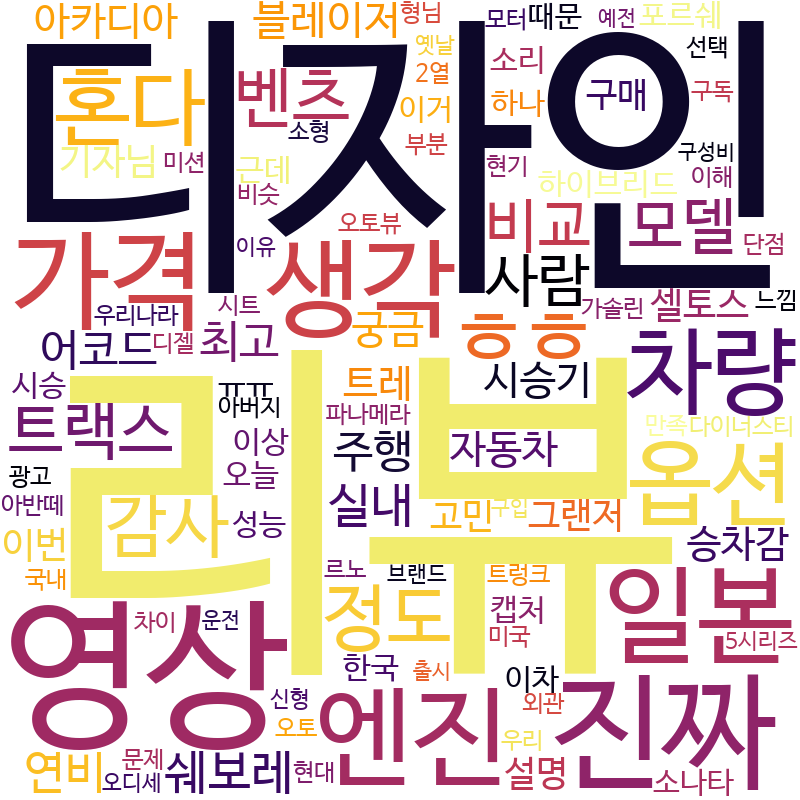

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter


word_list = sum(youtube_review_han_nouns, [])
count = Counter(word_list)
word_count = dict(count.most_common())


wc = WordCloud(font_path=fontpath, background_color = 'white',colormap=matplotlib.cm.inferno,  max_words=100, width=800, height=800, prefer_horizontal = True)
cloud = wc.fit_words(word_count)
cloud.to_image()

# cloud = wc.fit_words(count_dic)
# # tag가 명사이거나 형용사인 단어들만 noun_adj_list에 넣어준다.
# for word, tag in count_dic:
#     if tag in ['Noun' , 'Adjective']: 
#         noun_adj_list.append(word)
# print(noun_adj_list)
# # 가장 많이 나온 단어부터 40개를 저장한다.
# counts = Counter(noun_adj_list)
# tags = dict(counts.most_common())
# print(tags)


# wc = WordCloud(font_path='/System/Library/Fonts/Supplemental/AppleGothic.ttf', stopwords=stopwords, background_color="white", max_font_size=60)
# cloud = wc.generate_from_frequencies(tags)

# plt.figure(figsize=(10, 8))
# plt.axis('off')
# plt.imshow(cloud)
# plt.show()

In [ ]:
# 정규화
okt = Okt()

word = youtube_df['comments']

normalize_sentence_lst = []

for i in range(len(word)):
    normalize_sentence = okt.normalize(word[i])
    normalize_sentence_lst.append(normalize_sentence)
    print(normalize_sentence)

print(normalize_sentence_lst)

In [ ]:
# 맞춤법 + 띄어쓰기 교정
from hanspell import spell_checker

sent = "맞춤법 틀리면 외 않되? 쓰고싶은대로쓰면돼지 "
spelled_sent = spell_checker.check(sent)

hanspell_sent = spelled_sent.checked
print(hanspell_sent)

In [ ]:
# 불용어 설정

stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

## 단어 토큰화

In [ ]:
# okt.morphs
# -> 'G', '80' 이렇게 차모델 이름이 분리가 되는 문제 
okt = Okt()


youtube_review_okt_morphs = []

for i in range(len(words)):
    tokenized_sentence = okt.morphs(words[i])
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    youtube_review_okt_morphs.append(stopwords_removed_sentence)
    print(stopwords_removed_sentence)

print(youtube_review_okt_morphs)



In [ ]:
tokenizer = Tokenizer()

tokenizer.fit_on_texts(youtube_review_okt_morphs)

print(tokenizer.word_index)

In [ ]:
# okt.nouns
# -> 영어가 섞여있는 차종 모델을 삭제해버림

youtube_review_okt_nouns = []

for i in range(len(words)):
    tokenized_sentence = okt.nouns(words[i])
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    youtube_review_okt_nouns.append(stopwords_removed_sentence)
    print(stopwords_removed_sentence)

print(youtube_review_okt_nouns)

In [ ]:
tokenizer = Tokenizer()

tokenizer.fit_on_texts(youtube_review_okt_nouns)

print(tokenizer.word_index)

In [ ]:
# okt.pos
# -> 영어가 섞여있는 차종 모델을 삭제해버림

word = youtube_df['comments']

youtube_review_okt_pos = []

for i in range(len(normalize_sentence_lst)):
    tokenized_sentence = okt.pos(normalize_sentence_lst[i])
    stopwords_removed_sentence = [normalize_sentence_lst for normalize_sentence_lst in tokenized_sentence if not normalize_sentence_lst in stopwords] # 불용어 제거
    youtube_review_okt_pos.append(stopwords_removed_sentence)
    print(stopwords_removed_sentence)

print(youtube_review_okt_pos)

In [ ]:
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter

# open으로 txt파일을 열고 read()를 이용하여 읽는다.
text = open('test.txt').read() 


twitter = Twitter()

# twitter함수를 통해 읽어들인 내용의 형태소를 분석한다.
sentences_tag = []
sentences_tag = twitter.pos(text) 

noun_adj_list = []


# tag가 명사이거나 형용사인 단어들만 noun_adj_list에 넣어준다.
for word, tag in sentences_tag:
    if tag in ['Noun' , 'Adjective']: 
        noun_adj_list.append(word)


# 가장 많이 나온 단어부터 40개를 저장한다.
counts = Counter(noun_adj_list)
tags = counts.most_common(40) 


# WordCloud를 생성한다.
# 한글을 분석하기위해 font를 한글로 지정해주어야 된다. macOS는 .otf , window는 .ttf 파일의 위치를
# 지정해준다. (ex. '/Font/GodoM.otf')
wc = WordCloud(font_path=[otf 파일의 위치],background_color="white", max_font_size=60)
cloud = wc.generate_from_frequencies(dict(tags))


In [ ]:
from soynlp import DoublespaceLineCorpus
from soynlp.word import WordExtractor
from soynlp.tokenizer import LTokenizer
from soynlp.noun import LRNounExtractor
from soynlp.utils import DoublespaceLineCorpus
from soynlp.noun import LRNounExtractor_v2

In [ ]:
sents = DoublespaceLineCorpus("현대+쏘나타.csv",iter_sent=True)

In [ ]:
noun_extractor = LRNounExtractor_v2(verbose=True)
nouns = noun_extractor.train_extract(sents)

In [ ]:
list(noun_extractor._compounds_components.items())[:5]

In [ ]:
noun_extractor = LRNounExtractor(
    max_left_length=10, 
    max_right_length=7,
    predictor_fnames=None,
    verbose=True
)

In [ ]:
nouns = noun_extractor.train_extract(
    sents,
    min_noun_score=0.3,
    min_noun_frequency=20
)

In [ ]:
nouns['소나타']

In [ ]:
top100 = sorted(nouns.items(), 
    key=lambda x:-x[1].frequency)[:100]

for i, (word, score) in enumerate(top100):
    if i % 5 == 0:
        print()
    print('%6s (%.2f)' % (word, score.score), end='')

In [ ]:
top100 = sorted(nouns.items(), 
    key=lambda x:-x[1].frequency * x[1].score)[:100]

for i, (word, score) in enumerate(top100):
    if i % 5 == 0:
        print()
    print('%6s (%.2f)' % (word, score.score), end='')

In [ ]:
word_extractor = WordExtractor(min_frequency=100,
    min_cohesion_forward=0.05, 
    min_right_branching_entropy=0.0
)
word_extractor.train(sents) # list of str or like
words = word_extractor.extract()

In [ ]:
len(words)

In [ ]:
import math

def word_score(score):
    return (score.cohesion_forward * math.exp(score.right_branching_entropy))

print('단어   (빈도수, cohesion, branching entropy)\n')
for word, score in sorted(words.items(), key=lambda x:word_score(x[1]), reverse=True)[:30]:
    print('%s     (%d, %.3f, %.3f)' % (
            word, 
            score.leftside_frequency, 
            score.cohesion_forward,
            score.right_branching_entropy
            )
         )

In [ ]:
from soynlp.word import WordExtractor

word_extractor = WordExtractor()
word_extractor.train(sents)

In [ ]:
word_score = word_extractor.extract()

In [ ]:
scores = {word:score.cohesion_forward for word, score in word_score.items()}
l_tokenizer = LTokenizer(scores=scores)

for i in words:
  tokenized_sentences = l_tokenizer.tokenize(i, flatten=False)
  print(tokenized_sentences)

In [ ]:
from soynlp.tokenizer import MaxScoreTokenizer

maxscore_tokenizer = MaxScoreTokenizer(scores=scores)

for i in words:
  tokenized_sentences = maxscore_tokenizer.tokenize(i, flatten=False)
  print(tokenized_sentences)


In [ ]:
# hannanum.nouns
# -> 띄어쓰가 잘 안됨. -> 특수문자 제거하면 

han = Hannanum()

youtube_review_han_nouns = []

for i in range(len(word)):
    tokenized_sentence = han.nouns(word[i])
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    youtube_review_han_nouns.append(stopwords_removed_sentence)
    print(stopwords_removed_sentence)

print(youtube_review_han_nouns)